In [1]:
import sys
import os

SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)

#from markov_device import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm

In [2]:
def load_simulation(model_name='markov-model1'):
    df1_state1stay=pd.read_csv('../data/%s-state1stay.csv' % (model_name), index_col=0, header=0, low_memory=False)
    df1_state1stay=df1_state1stay.loc[df1_state1stay['received_reward']!='received_reward']
    df1_state1stay['epoch'] = pd.to_numeric(df1_state1stay['epoch'], errors='coerce')
    df1_state1stay['received_reward'] = pd.to_numeric(df1_state1stay['received_reward'], errors='coerce')
    df1_state1stay['state1_stay'] = pd.to_numeric(df1_state1stay['state1_stay'], errors='coerce')
    
    if model_name=='markov-model3':
        df1_state1stay.index = range(len(df1_state1stay))
        df1_state1stay_new = df1_state1stay.drop(list(range(100, 200)) + list(range(500000, 500200)), axis=0)
        df11_state1stay = df1_state1stay_new.loc[:500000]
        df12_state1stay = df1_state1stay_new.loc[500000:]

    df1 = pd.read_csv('../data/%s-beh.csv' % (model_name), index_col=0, header=0, low_memory=False)
    df1=df1.loc[df1['received_reward']!='received_reward']
    df1['index_bin'] = pd.to_numeric(df1['index_bin'], errors='coerce')
    df1['optimal_response_sum_prop'] = pd.to_numeric(df1['optimal_response_sum_prop'], errors='coerce')
    df1['received_reward_sum_prop'] = pd.to_numeric(df1['received_reward_sum_prop'], errors='coerce')
    
    if model_name=='markov-model3':
        df1.index = range(len(df1)) 
        df1_new = df1.drop(list(range(100, 200)) + list(range(500000, 500200)), axis=0)

        df11 = df1_new.loc[:500000]
        df12 = df1_new.loc[500000:]
        return df11,df12, df11_state1stay, df12_state1stay
    
    
    return df1, df1_state1stay

In [3]:
model1 = "markov-model1"
model2 = "markov-model2"
model3 = "markov-model3"
# df1, df2, df3 = try_simulation_example()
df1, df1_state1stay = load_simulation(model1)
df2, df2_state1stay = load_simulation(model2)
df31, df32, df31_state1stay, df32_state1stay = load_simulation(model3)

In [19]:
# fig, axes = plt.subplots(2,1, figsize=(12,12))
# fig.suptitle('Leanring Curve: Optimal Response Sequence (Cumulative)')
# axes[0].set_title('Optimal Response (Cumulative)')
# axes[1].set_title('Gained Reward (Cumulative)')

# sns.lineplot(data=df1, x='index_bin', y='optimal_response_sum_prop', color='steelblue', marker='o', lw=3, 
#              label='%s [%d]' % (model1, int(df1['received_reward'].values.max())), ax=axes[0])
# sns.lineplot(data=df2, x='index_bin', y='optimal_response_sum_prop', color='tomato', marker='o', lw=3, 
#              label='%s [%d]' % (model2, int(df2['received_reward'].values.max())), ax=axes[0])
# sns.lineplot(data=df31, x='index_bin', y='optimal_response_sum_prop', color='purple', marker='o', lw=3, ls='--', 
#              label='%s [%d]' % (model3, int(df31['received_reward'].values.max())), ax=axes[0])
# sns.lineplot(data=df32, x='index_bin', y='optimal_response_sum_prop', color='purple', marker='o', lw=3, 
#              label='%s [%d]' % (model3, int(df32['received_reward'].values.max())), ax=axes[0])


# sns.lineplot(data=df1, x='index_bin', y='received_reward_sum_prop', color='steelblue', marker='o', lw=3, 
#              label='%s [%d]' % (model1, int(df1['received_reward'].values.max())), ax=axes[1])
# sns.lineplot(data=df2, x='index_bin', y='received_reward_sum_prop', color='tomato', marker='o', lw=3, 
#              label='%s [%d]' % (model2, int(df2['received_reward'].values.max())), ax=axes[1])
# sns.lineplot(data=df31, x='index_bin', y='received_reward_sum_prop', color='purple', marker='o', lw=3, ls='--', 
#              label='%s [%d]' % (model3, int(df31['received_reward'].values.max())), ax=axes[1])
# sns.lineplot(data=df32, x='index_bin', y='received_reward_sum_prop', color='purple', marker='o', lw=3, 
#              label='%s [%d]' % (model3, int(df32['received_reward'].values.max())), ax=axes[1])
# plt.show()

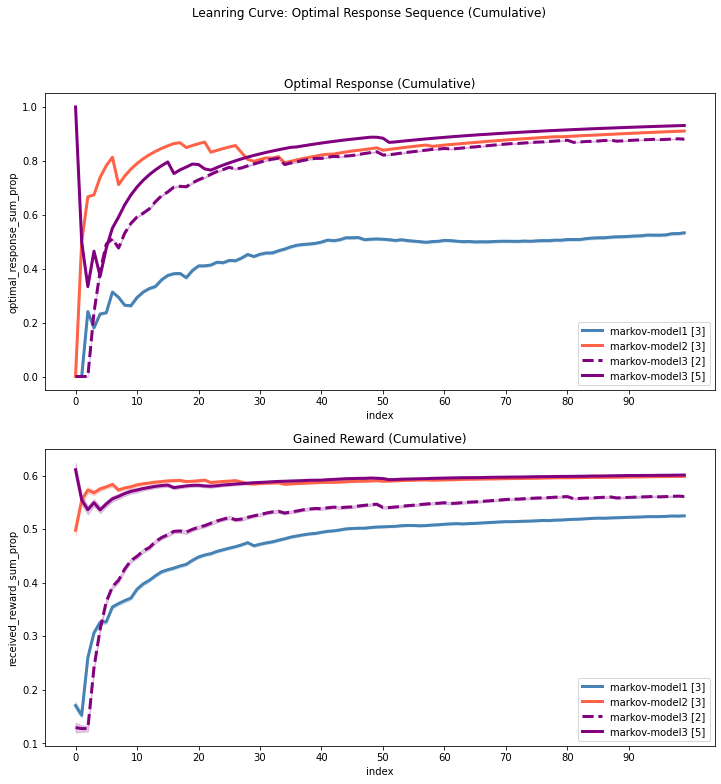

In [18]:
fig, axes = plt.subplots(2,1, figsize=(12,12))
fig.suptitle('Leanring Curve: Optimal Response Sequence (Cumulative)')
axes[0].set_title('Optimal Response (Cumulative)')
axes[1].set_title('Gained Reward (Cumulative)')

sns.lineplot(data=df1, x='index', y='optimal_response_sum_prop', color='steelblue',  lw=3, 
             label='%s [%d]' % (model1, int(df1['received_reward'].values.max())), ax=axes[0])
sns.lineplot(data=df2, x='index', y='optimal_response_sum_prop', color='tomato', lw=3, 
             label='%s [%d]' % (model2, int(df2['received_reward'].values.max())), ax=axes[0])
sns.lineplot(data=df31, x='index', y='optimal_response_sum_prop', color='purple', lw=3, ls='--', 
             label='%s [%d]' % (model3, int(df31['received_reward'].values.max())), ax=axes[0])
sns.lineplot(data=df32, x='index', y='optimal_response_sum_prop', color='purple', lw=3, 
             label='%s [%d]' % (model3, int(df32['received_reward'].values.max())), ax=axes[0])


sns.lineplot(data=df1, x='index', y='received_reward_sum_prop', color='steelblue', lw=3, 
             label='%s [%d]' % (model1, int(df1['received_reward'].values.max())), ax=axes[1])
sns.lineplot(data=df2, x='index', y='received_reward_sum_prop', color='tomato', lw=3, 
             label='%s [%d]' % (model2, int(df2['received_reward'].values.max())), ax=axes[1])
sns.lineplot(data=df31, x='index', y='received_reward_sum_prop', color='purple', lw=3, ls='--', 
             label='%s [%d]' % (model3, int(df31['received_reward'].values.max())), ax=axes[1])
sns.lineplot(data=df32, x='index', y='received_reward_sum_prop', color='purple', lw=3, 
             label='%s [%d]' % (model3, int(df32['received_reward'].values.max())), ax=axes[1])

# set the labels
axes[0].set_xticks(ticks=np.arange(0,100,10), labels=np.arange(0,100,10))
axes[1].set_xticks(ticks=np.arange(0,100,10), labels=np.arange(0,100,10))

plt.show()